In [1]:
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
len(mnist['data'])

70000

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y = y.astype('float')

In [7]:
y.dtype

dtype('float64')

In [8]:
y.shape

(70000,)

# Visualisation

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

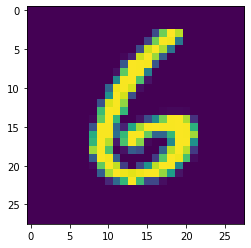

In [12]:
viz(6000)

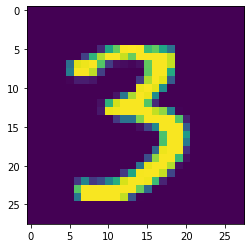

In [13]:
viz(10000)

# Locating the number 4 and plot the image

In [14]:
np.where(y == 4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

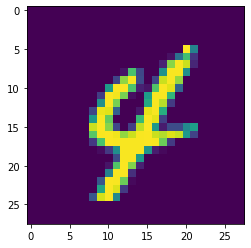

In [16]:
_ = X[69977]
_image = _.reshape(28,28)
plt.imshow(_image)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
# Alternative way to split data

In [19]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

In [20]:
shuffel_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffel_index], y_train[shuffel_index]

# Training a binary clasifier


In [21]:
y_train_0 = (y_train == 0)

In [22]:
y_test_0 = (y_test == 0)

# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
clf.predict(X[10001].reshape(1,-1))

array([False])

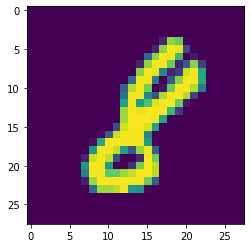

In [27]:
viz(10001)

# Performance measures

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [29]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

C:\Users\J5654379\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [30]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9870
0.9892
0.9880


# cross_val_score using K-folds

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(clf,X_train, y_train, cv=3, scoring = 'accuracy')

array([0.87135, 0.8736 , 0.87625])

# Confusion matrix

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
y_train_pred = cross_val_predict(clf, X_train,y_train_0,cv=3)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_train_0,y_train_pred)

array([[53769,   308],
       [  407,  5516]], dtype=int64)

In [39]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred))

,0,1
0,53769,308
1,407,5516


In [40]:
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      53769      308
       Positive        407     5516

In [41]:
from sklearn.metrics import precision_score, recall_score

In [42]:
precision_score(y_train_0, y_train_pred) # 5618 / (574 + 5618)

0.9471153846153846

In [43]:
recall_score(y_train_0, y_train_pred)

0.9312848218808036

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_train_0, y_train_pred)

0.9391333957606197

In [46]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([4971.20593944])

In [49]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [50]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

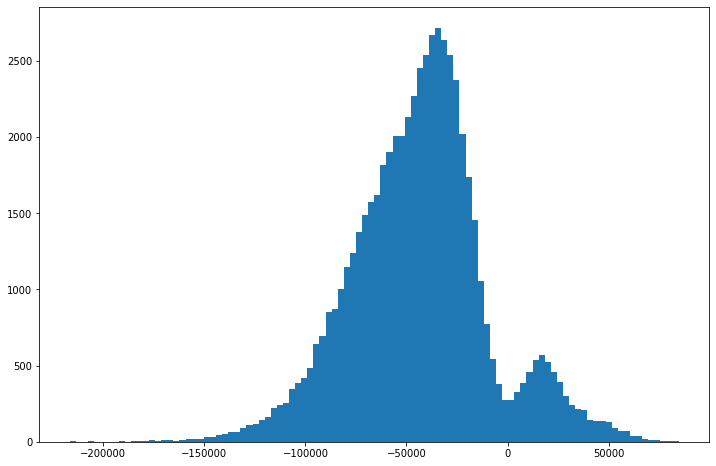

In [51]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

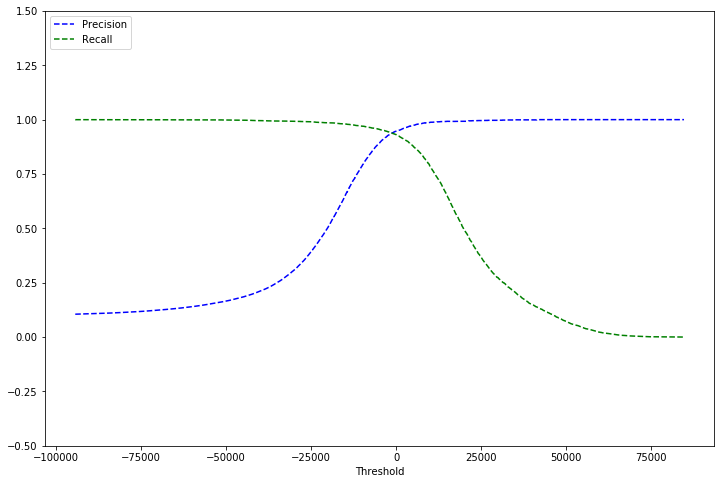

In [55]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

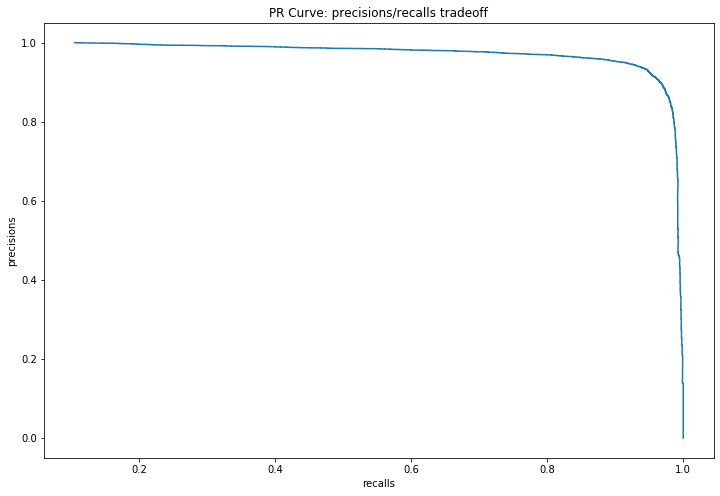

In [56]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [59]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

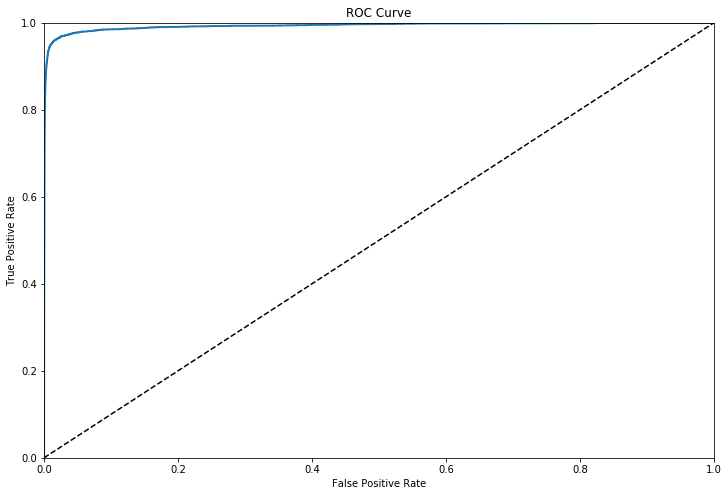

In [60]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_train_0, y_scores)

0.9934018428727908